# Kural Tabanlı Sınıflandırma - Persona (Level Based Classification)

**Problem:**
* Bir oyun şirketi seviye tabanlı yeni müşteri tanımları oluşturmak istemektedir.
* Bu segmentlere göre yeni müşterilerden ne kadar kazanabileceğini öğrenmek istiyor.

**Veri Seti:**
* Her satış bir kayıt olarak tutulmaktadır.
* price: müşterinin harcama tutarı
* source: müşterinin bağlandığı cihaz türü
* sex: müşterinin cinsiyeti
* country: müşterinin ülkesi
* age: müşterinin yaşı

Proje ile ilgili Medium'daki yazım: https://medium.com/@sanlian/kural-tabanlı-sınıflandırma-potansiyel-müşteri-getiri-tahminleme-71a333aacae1

## Kütüphaneler ve Verisetinin Tanınması

In [1]:
# Verisetinin okunması ve işlemlerin yapılması için kullanılacak Pandas, Seaborn, Matplotlib kütüphanelerinin eklenmesi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verisetinin okunması
persona_df = pd.read_csv("/kaggle/input/persona-dataset/persona.csv")

In [2]:
# Verisetinin ilk 5 gözlemini görmek
persona_df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


## Keşifsel Veri Analizi

In [3]:
# Verisetine genel bakış
persona_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [4]:
# Numerik değişkenlerin temel istatistikleri
persona_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRICE,5000.0,34.1320,12.464897,9.0,29.0,39.0,39.0,59.0
AGE,5000.0,23.5814,8.995908,15.0,17.0,21.0,27.0,66.0


In [5]:
# Tekil değerleri bulmak
print("fiyatlar:", persona_df["PRICE"].unique())
print("platformlar:", persona_df["SOURCE"].unique())
print("cinsiyetler:", persona_df["SEX"].unique())
print("ülkeler:", persona_df["COUNTRY"].unique())
print("yaşlar:", persona_df["AGE"].unique())

fiyatlar: [39 49 29 19 59  9]
platformlar: ['android' 'ios']
cinsiyetler: ['male' 'female']
ülkeler: ['bra' 'tur' 'usa' 'can' 'deu' 'fra']
yaşlar: [17 26 23 15 19 21 16 35 42 40 49 34 18 32 25 30 20 22 50 37 24 31 28 66
 27 47 57 52 39 59 46 36 29 51 55 53 33 43 38 56 54 41 44 45 65 61]


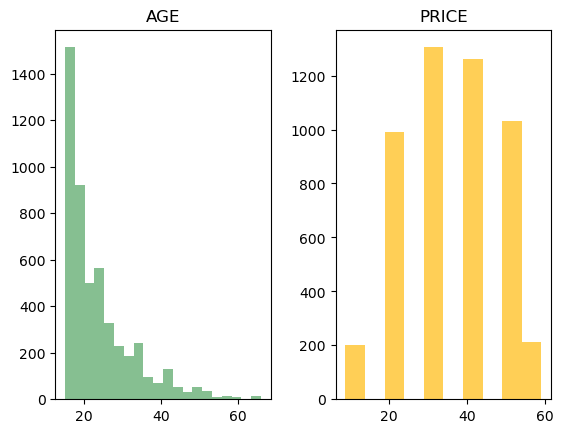

In [6]:
# Yaş ve Fiyat dağılımlarının incelenmesi
fig, ax = plt.subplots(1, 2)
persona_df.hist("AGE", bins = 20, grid=False, color='#86bf91', ax = ax[0])
persona_df.hist("PRICE", grid=False, color='#FFCF56', ax = ax[1]);

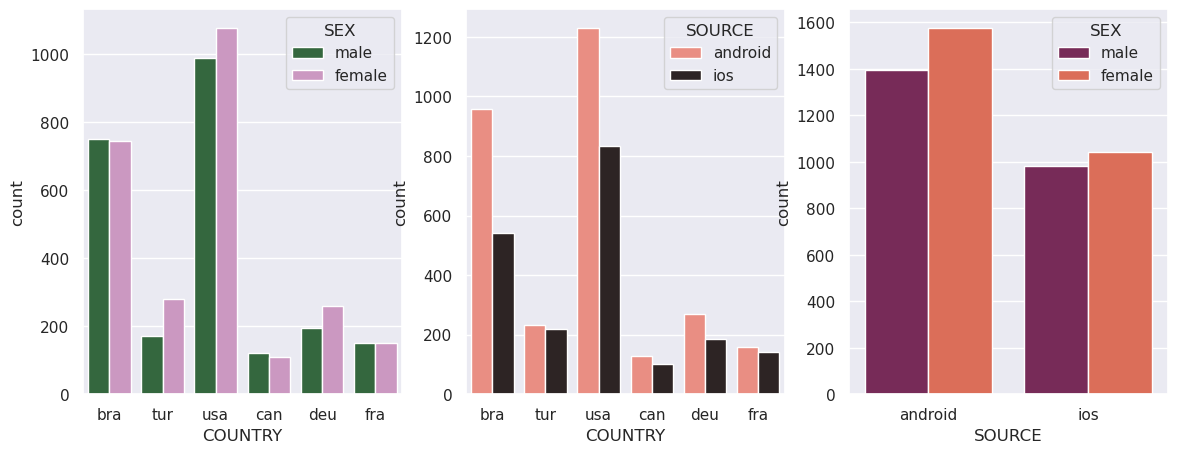

In [7]:
# Ülke-Cinsiyet, Ülke-Platform, Platform-Cinsiyet kırılımlarının incelenmesi
sns.set(rc={'figure.figsize':(14,5)})
fig, ax = plt.subplots(1, 3)
sns.countplot(x = "COUNTRY", hue = "SEX", data = persona_df, palette= "cubehelix", ax = ax[0])
sns.countplot(x = "COUNTRY", hue = "SOURCE", data = persona_df, palette= "dark:salmon_r", ax = ax[1])
sns.countplot(x = "SOURCE", hue = "SEX", data = persona_df, palette= "rocket", ax = ax[2]);

In [8]:
# Ülkelere Göre Ortalama ve Toplam Kazanç
persona_df.groupby("COUNTRY").agg({"PRICE": ["sum", "count", "mean"]})

PRICE                 
           sum count       mean
COUNTRY                        
bra      51354  1496  34.327540
can       7730   230  33.608696
deu      15485   455  34.032967
fra      10177   303  33.587459
tur      15689   451  34.787140
usa      70225  2065  34.007264

In [9]:
# Platforma Göre Ortalama ve Toplam Kazanç
persona_df.groupby("SOURCE").agg({"PRICE": ["sum", "count", "mean"]})

PRICE                 
            sum count       mean
SOURCE                          
android  101636  2974  34.174849
ios       69024  2026  34.069102

In [10]:
# Cinsiyete Göre Ortalama ve Toplam Kazanç
persona_df.groupby("SEX").agg({"PRICE": ["sum", "count", "mean"]})

PRICE                 
          sum count       mean
SEX                           
female  88989  2621  33.952308
male    81671  2379  34.329971

## Verisetini Ön İşleme

In [11]:
# Verisetini kategorik değişkenlere göre gruplayıp price'ın ortalamasını almak
# Verisetini ortalama price değerlerine göre azalan biçimde sıralamak
# Bu işlem sonucundan her bir country-source-sex-age kırılımndan bir tane satır (ortalama) dönecektir
persona_df = persona_df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values(by = ["PRICE"], ascending = False).reset_index()

persona_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


In [12]:
# Age sayısal değişkeninin kategorik değişkene çevrilmesi
# Age kategorilendirmesinin belirlenmesi
# birinci kategori: geniş aralıklı yaşlar: 0-18, 19-23, 24-30, 31-40, 41-70
# ikinci kategori: genç odaklı aralıklar: 0-18, 19-21, 22-24, 25-27, 28-30, 31-35, 36-50, 51-70
# üçüncü kategor: 1-1 yaşlar: her yaş 1 kategori

wide_range_df = persona_df.copy()
wide_range_df["AGE_CAT"] = pd.cut(wide_range_df["AGE"], bins = [0, 18, 23, 30, 40, 70], labels = ["0_18", "19_23", "24_30", "31_40", "41_70"])

young_based_df = persona_df.copy()
young_based_df["AGE_CAT"] = pd.cut(young_based_df["AGE"], bins = [0, 18, 21, 24, 27, 30, 35, 50, 70], labels = ["0_18", "19_21", "22_24", "25_27", "28-30", "31_35", "36_50", "51_70"])

one_by_one_df = persona_df.copy()
one_by_one_df["AGE_CAT"] = one_by_one_df["AGE"].astype("str")
one_by_one_df["AGE"] = one_by_one_df["AGE"].astype("str")

In [13]:
# Birleştirilecek sütunların listede toplanması
joined_columns = ["COUNTRY", "SOURCE", "SEX", "AGE_CAT"]

# Birleştirme işleminin geniş yaş aralıkları içeren dataframe için uygulanması
wide_range_df["CUSTOMERS_LEVEL_BASED"] = wide_range_df[joined_columns].T.agg("_".join).str.upper()
wide_range_df = wide_range_df.groupby("CUSTOMERS_LEVEL_BASED").agg({"PRICE": "mean"})
wide_range_df = wide_range_df.reset_index()
#segment belirlenmesi
wide_range_df["SEGMENT"] = pd.qcut(wide_range_df["PRICE"], 4, labels = ["D", "C", "B", "A"])


# Birleştirme işlemnin genç odaklı yaş aralıkları içeren dataframe için uygulanması
young_based_df["CUSTOMERS_LEVEL_BASED"] = young_based_df[joined_columns].T.agg("_".join).str.upper()
young_based_df = young_based_df.groupby("CUSTOMERS_LEVEL_BASED").agg({"PRICE": "mean"})
young_based_df = young_based_df.reset_index()
#segment belirlenmesi
young_based_df["SEGMENT"] = pd.qcut(young_based_df["PRICE"], 4, labels = ["D", "C", "B", "A"])


# Birleştirme işlemnin 1e1 yaş aralıkları içeren dataframe için uygulanması
one_by_one_df["AGE"] = one_by_one_df["AGE"].astype("str")
one_by_one_df["CUSTOMERS_LEVEL_BASED"] = one_by_one_df[["COUNTRY", "SOURCE", "SEX", "AGE"]].T.agg("_".join).str.upper()
one_by_one_df = one_by_one_df.groupby("CUSTOMERS_LEVEL_BASED").agg({"PRICE": "mean"})
one_by_one_df = one_by_one_df.reset_index()
#segment belirlenmesi
one_by_one_df["SEGMENT"] = pd.qcut(one_by_one_df["PRICE"], 4, labels = ["D", "C", "B", "A"])

#dataframelerin görünümü
wide_range_df.head()

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_70,36.737179,A


In [14]:
# Segmentlerin örnek gösterimi
wide_range_df.groupby("SEGMENT").agg({"PRICE": ["mean", "max", "min", "sum", "std"]})
# Diğer dataframeler için;
# young_based_df.groupby("SEGMENT").agg({"PRICE": ["mean", "max", "min", "sum", "std"]})
# one_by_one_df.groupby("SEGMENT").agg({"PRICE": ["mean", "max", "min", "sum", "std"]})

PRICE                                             
              mean        max        min          sum       std
SEGMENT                                                        
D        29.206780  32.333333  19.000000   817.789833  3.638037
C        33.509674  34.077340  32.500000   904.761209  0.492587
B        34.999645  36.000000  34.103727   944.990411  0.636502
A        38.691234  45.428571  36.060606  1044.663328  2.581762

## Yeni Müşterinin Tahminlemesini Yapma Fonksiyonu
* Fonksiyona ihtiyaç duyulmasının sebebi 3 ayrı kategori için bu işlemin yapılacak olması

In [15]:
#yeni müşterinin tahmini getirisini hesaplama fonksiyonu (3 farklı kategoriden)
def expected_price(country, source, sex, age):
    """
    1. girilen age değerini 3 farklı kategoriye göre kategorilendirir,
    2. oluşan kategori değerini diğer girdiler ile birleştirerek CUSTOMER_LEVEL_BASED haline getirir
    3. oluşan CUSTOMER_LEVEL_BASED değerinin ilgili dataframe'lerde olup olmadığını kontrol eder
        3.1 eğer dataframe'lerde varsa bilgileri daha sonra birleştirmek için saklar
        3.2 eğer dataframe'lerde yoksa CUSTOMER_LEVEL_BASED değişkeninin yanına "No Match" ifadesi getirir, saklar
    4. saklanan dataframeler tek çıktı olması için birleştirilir
    5. satırlara yeni bir değer eklenerek hangi modele ait olduğunu belirtir
    6. sonuç dataframe'ini verir

    :param country: ülke kodu giriniz:  USA, BRA, DEU, TUR, FRA, CAN
    :param source: platform giriniz: ANDROID, IOS
    :param sex: cinsiyet giriniz: FEMALE, MALE
    :param age: yaş giriniz: [0, 70]
    :return result_df: müşterinin getirisini 3 farklı modelde bulup tek dataframe halinde sunar

    :example expected_price("TUR", "ANDROID", "FEMALE", 65)

    :expected output
      CUSTOMERS_LEVEL_BASED      PRICE      SEGMENT      Option
100   TUR_ANDROID_FEMALE_51_70  32.571429      C     Young_Based_Model
73    TUR_ANDROID_FEMALE_41_70  34.119048      B     Wide_Range_Model
0     TUR_ANDROID_FEMALE_65     No Match    No Match   One-One_Model

    """

    #farklı yaş aralıklarına göre müşterinin kategorisinin belirlenmesi
    if age <= 18:
        young_based_age_level = "0_18"
        wide_age_level = "0_18"
    elif age <= 21:
        young_based_age_level = "19_21"
        wide_age_level = "19_23"
    elif age <= 24:
        young_based_age_level = "22_24"
        if age <= 23:
            wide_age_level = "19_23"
    elif age <= 27:
        young_based_age_level = "25_27"
        wide_age_level = "24_30"
    elif age <= 30:
        young_based_age_level = "28_30"
        wide_age_level = "24_30"
    elif age <= 35:
        young_based_age_level = "31_35"
        wide_age_level = "31_40"
    elif age <= 50:
        young_based_age_level = "36_50"
        if age <= 40:
            wide_age_level = "31_40"
        else:
            wide_age_level = "41_70"
    else:
        young_based_age_level = "51_70"
        wide_age_level = "41_70"

    #yeni müşteri levelinin 3 farklı kategorilendirmeye göre oluşturulması
    young_new_customer = country + "_" + source + "_" + sex + "_" + young_based_age_level
    wide_new_customer = country + "_" + source + "_" + sex + "_" + wide_age_level
    one_new_customer = country + "_" + source + "_" + sex + "_" + str(age)

    #yeni müşterinin 3 farklı kategoriden tahmininin çekilmesi
    if young_new_customer in young_based_df.values:
        df1 = young_based_df[young_based_df["CUSTOMERS_LEVEL_BASED"] == young_new_customer]
    else:
        df1 = pd.DataFrame([[young_new_customer, "No Match", "No Match"]], columns = ["CUSTOMERS_LEVEL_BASED", "PRICE", "SEGMENT"])

    if wide_new_customer in wide_range_df.values:
        df2 = wide_range_df[wide_range_df["CUSTOMERS_LEVEL_BASED"] == wide_new_customer]
    else:
        df2 = pd.DataFrame([[wide_new_customer, "No Match", "No Match"]], columns = ["CUSTOMERS_LEVEL_BASED", "PRICE", "SEGMENT"])

    if one_new_customer in one_by_one_df.values:
        df3 = one_by_one_df[one_by_one_df["CUSTOMERS_LEVEL_BASED"] == one_new_customer]
    else:
        df3 = pd.DataFrame([[one_new_customer, "No Match", "No Match"]], columns = ["CUSTOMERS_LEVEL_BASED", "PRICE", "SEGMENT"])

    #tahminlerin birleştirilmesi
    result_df = pd.concat([df1, df2, df3])
    result_df["Option"] = ["Young_Based_Model", "Wide_Range_Model", "One-One_Model"]

    #sonuç dataframeinin yazdırılması
    return result_df

## Tahminlemenin Yapılması

In [16]:
expected_price("TUR", "ANDROID", "FEMALE", 65)

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT,Option
100,TUR_ANDROID_FEMALE_51_70,32.571429,C,Young_Based_Model
73,TUR_ANDROID_FEMALE_41_70,34.119048,B,Wide_Range_Model
0,TUR_ANDROID_FEMALE_65,No Match,No Match,One-One_Model


In [17]:
expected_price("BRA", "ANDROID", "MALE", 17)

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT,Option
8,BRA_ANDROID_MALE_0_18,34.805861,B,Young_Based_Model
5,BRA_ANDROID_MALE_0_18,34.805861,B,Wide_Range_Model
28,BRA_ANDROID_MALE_17,37.157895,A,One-One_Model


In [18]:
expected_price("DEU", "IOS", "MALE", 21)

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT,Option
64,DEU_IOS_MALE_19_21,49.0,A,Young_Based_Model
48,DEU_IOS_MALE_19_23,39.0,A,Wide_Range_Model
0,DEU_IOS_MALE_21,No Match,No Match,One-One_Model


In [19]:
expected_price("DEU", "IOS", "FEMALE", 21)

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT,Option
0,DEU_IOS_FEMALE_19_21,No Match,No Match,Young_Based_Model
44,DEU_IOS_FEMALE_19_23,34.0,C,Wide_Range_Model
0,DEU_IOS_FEMALE_21,No Match,No Match,One-One_Model
